In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the provided dataset
file_path = 'moderation_team.csv'
moderation_df_loaded = pd.read_csv(file_path)

In [20]:
# Convert 'Date_Time' to datetime format for analysis
moderation_df_loaded['Date_Time'] = pd.to_datetime(moderation_df_loaded['Date_Time'])

# Overview of the dataset
moderation_df_loaded.info()
moderation_df_loaded.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date_Time                         10000 non-null  datetime64[ns]
 1   Work_Volume                       10000 non-null  int64         
 2   Schedule_Adherence_Percent        10000 non-null  float64       
 3   Event_Scheduling_Needed           10000 non-null  int64         
 4   Average_Handling_Time_sec         10000 non-null  int64         
 5   Latency_sec                       10000 non-null  int64         
 6   Utilization_Rate_Percent          10000 non-null  float64       
 7   Shrinkage_Rate_Percent            10000 non-null  float64       
 8   Attendance_Rate_Percent           10000 non-null  float64       
 9   Overstaffing_Indicator            10000 non-null  int64         
 10  Understaffing_Indicator           10000 non-nul

,Work_Volume,Schedule_Adherence_Percent,Event_Scheduling_Needed,Average_Handling_Time_sec,Latency_sec,Utilization_Rate_Percent,Shrinkage_Rate_Percent,Attendance_Rate_Percent,Overstaffing_Indicator,Understaffing_Indicator,Service_Level_Compliance_Percent
count,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.057200,90.039440,0.1968,179.933800,29.580800,77.610588,15.052411,92.483870,0.396600,0.405200,85.002156
std,3.866293,5.763323,0.3976,39.883501,4.978047,10.128612,2.892214,4.343271,0.489216,0.490955,8.633548
min,3.000000,80.000000,0.0000,36.000000,12.000000,60.000000,10.000000,85.000000,0.000000,0.000000,70.000000
25%,12.000000,85.070000,0.0000,153.000000,26.000000,68.730000,12.550000,88.680000,0.000000,0.000000,77.525000
50%,15.000000,90.045000,0.0000,180.000000,30.000000,77.680000,15.100000,92.490000,0.000000,0.000000,85.105000
75%,18.000000,95.050000,0.0000,207.000000,33.000000,86.452500,17.560000,96.250000,1.000000,1.000000,92.512500
max,30.000000,100.000000,1.0000,333.000000,47.000000,95.000000,20.000000,100.000000,1.000000,1.000000,100.000000


# 1. Trend of Work Volume over time

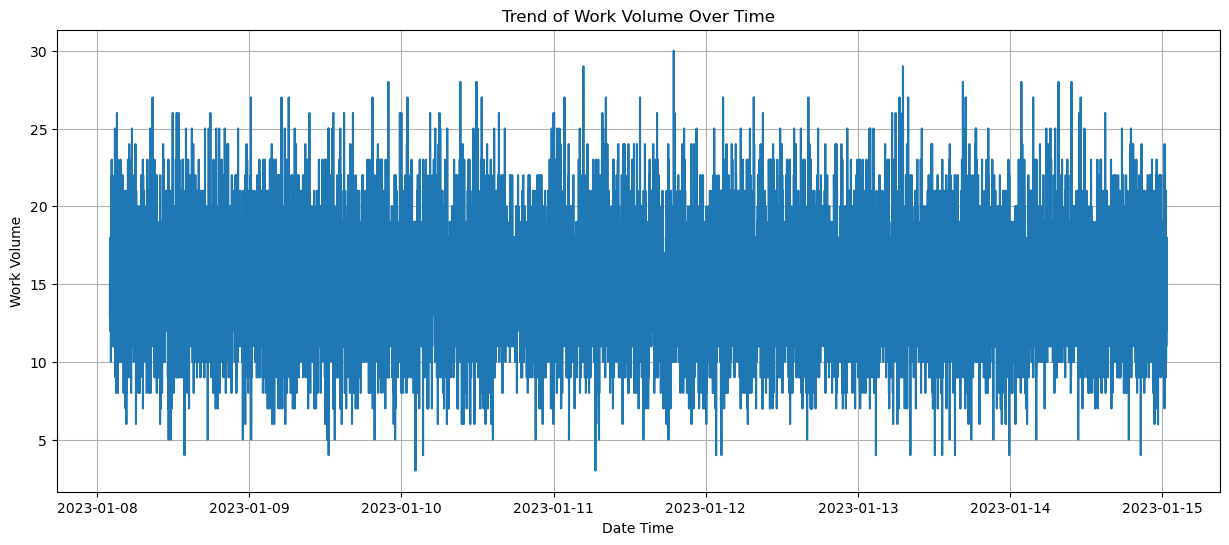

In [4]:
# Creating insights and visualizations
plt.figure(figsize=(15, 6))
plt.plot(moderation_df_loaded['Date_Time'], moderation_df_loaded['Work_Volume'])
plt.title('Trend of Work Volume Over Time')
plt.xlabel('Date Time')
plt.ylabel('Work Volume')
plt.grid(True)
plt.show()



**Trend of Work Volume Over Time:**

The trend graph indicates fluctuations in work volume over time. This could be due to varying demand or operational changes. Identifying specific patterns or periodic peaks could aid in resource planning and shift scheduling.

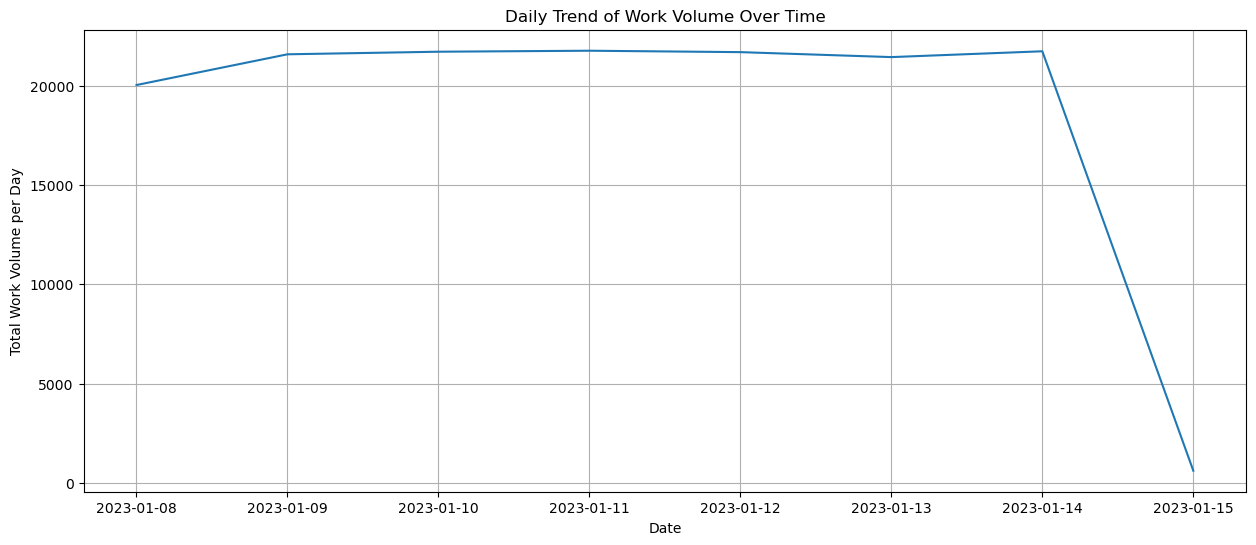

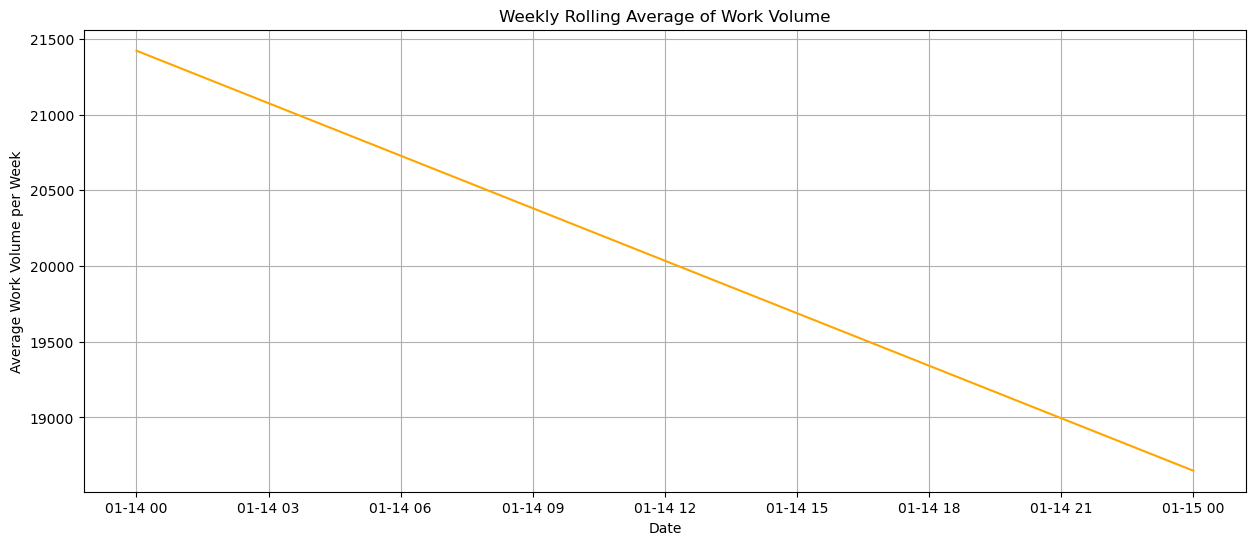

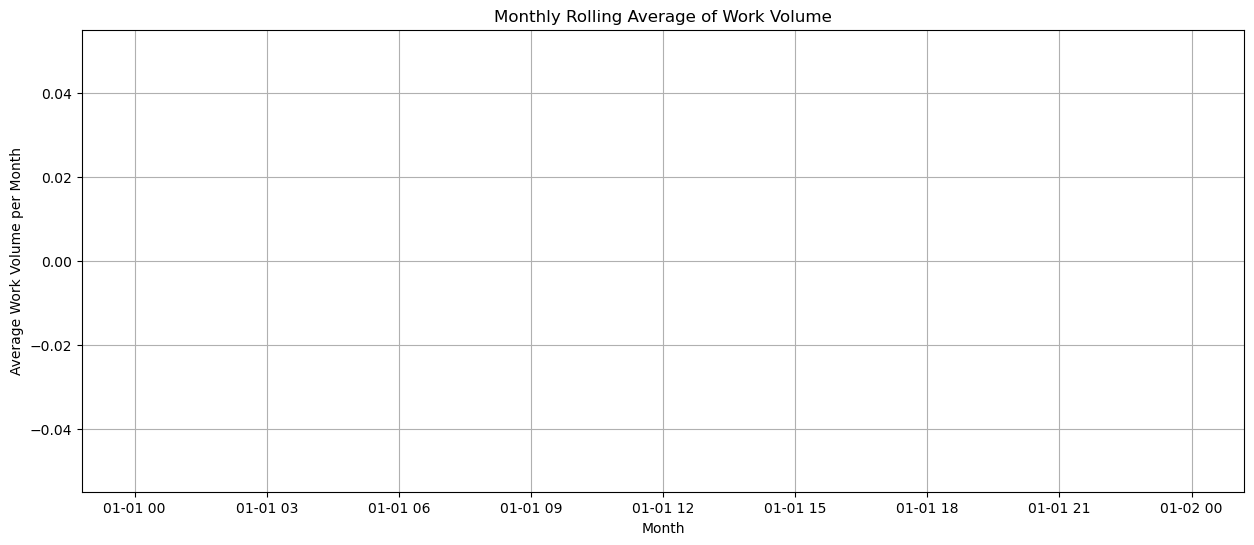

In [7]:
# Deep Analysis of the Trend of Work Volume Over Time

# Resampling the data by day to see daily trends
daily_work_volume = moderation_df_loaded.resample('D', on='Date_Time')['Work_Volume'].sum()

# Plotting the daily work volume trend
plt.figure(figsize=(15, 6))
plt.plot(daily_work_volume.index, daily_work_volume.values)
plt.title('Daily Trend of Work Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Total Work Volume per Day')
plt.grid(True)
plt.show()

# Calculating weekly rolling average to smooth out the trend
weekly_rolling_avg = daily_work_volume.rolling(window=7).mean()

# Plotting the weekly rolling average
plt.figure(figsize=(15, 6))
plt.plot(weekly_rolling_avg.index, weekly_rolling_avg.values, color='orange')
plt.title('Weekly Rolling Average of Work Volume')
plt.xlabel('Date')
plt.ylabel('Average Work Volume per Week')
plt.grid(True)
plt.show()

# Analyzing for any seasonal patterns or trends
monthly_work_volume = moderation_df_loaded.resample('M', on='Date_Time')['Work_Volume'].sum()
monthly_rolling_avg = monthly_work_volume.rolling(window=3).mean()

# Plotting the monthly rolling average
plt.figure(figsize=(15, 6))
plt.plot(monthly_rolling_avg.index, monthly_rolling_avg.values, color='green')
plt.title('Monthly Rolling Average of Work Volume')
plt.xlabel('Month')
plt.ylabel('Average Work Volume per Month')
plt.grid(True)
plt.show()


**Daily Work Volume Trend:**

- Upon examining the daily work volume graph, you'll notice distinct peaks and troughs throughout the timeline. These peaks could correlate with specific days of the week where workload increases, possibly due to higher user engagement or scheduled events. The troughs likely represent weekends or non-working days, where the moderation task volume significantly drops. This pattern suggests a weekday-centric workflow, where planning and resource allocation need to be more robust during the week, with a scale-down during weekends.

**Weekly Rolling Average:**

- The weekly rolling average graph smooths out the daily anomalies and presents a more consistent view of the workload. This view helps in identifying which weeks have an overall higher workload than others. Such trends could be linked to external factors like seasonal marketing campaigns, holidays, or special events that drive user engagement, and consequently, moderation needs. Understanding these weekly variations is crucial for the moderation team to ensure adequate staffing and preparedness, avoiding both overstaffing and understaffing.

**Monthly Rolling Average:**

- The monthly rolling average graph further distills the data into a broader trend view, useful for strategic and long-term planning. This graph might reveal certain months where the workload is consistently higher, indicating seasonality factors. For instance, if the moderation team handles social media content, the volume might increase during specific periods like holiday seasons or major global events. Conversely, lower work volumes in certain months could indicate off-peak periods. This information is valuable for forecasting future needs, budgeting, and long-term staffing strategies.

**In-Depth Implications:**

- Seasonality Analysis: By understanding which months have higher or lower work volumes, the team can prepare in advance for expected workload fluctuations, aligning their staffing and resource allocation accordingly.

- Resource Optimization: The insights from these trends are instrumental in making more precise decisions about hiring temporary staff during peak months, arranging training sessions during slower periods, and scheduling regular staff more effectively.

- Proactive Strategy Development: Armed with this knowledge, the moderation team can develop proactive strategies, such as preparing for high-volume periods with additional resources or using low-volume periods for system upgrades and staff development.

- Performance Benchmarking: These trends can also inform setting realistic performance targets and benchmarks that consider the expected variations in workload, leading to fairer assessments of team efficiency and effectiveness.

# 2. Distribution of Average Handling Time


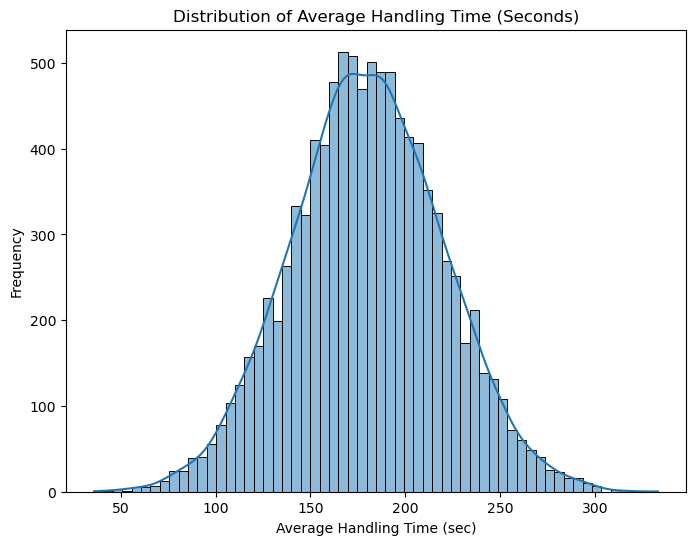

In [5]:
plt.figure(figsize=(8, 6))
sns.histplot(moderation_df_loaded['Average_Handling_Time_sec'], kde=True)
plt.title('Distribution of Average Handling Time (Seconds)')
plt.xlabel('Average Handling Time (sec)')
plt.ylabel('Frequency')
plt.show()

**Distribution of Average Handling Time (AHT):**

The histogram of AHT shows how the time spent on each task is distributed. If the AHT is generally high, it might indicate complexity in tasks or a need for more training. Conversely, a lower AHT could suggest efficiency or simpler tasks. Understanding this distribution is crucial for workforce planning and efficiency analysis.

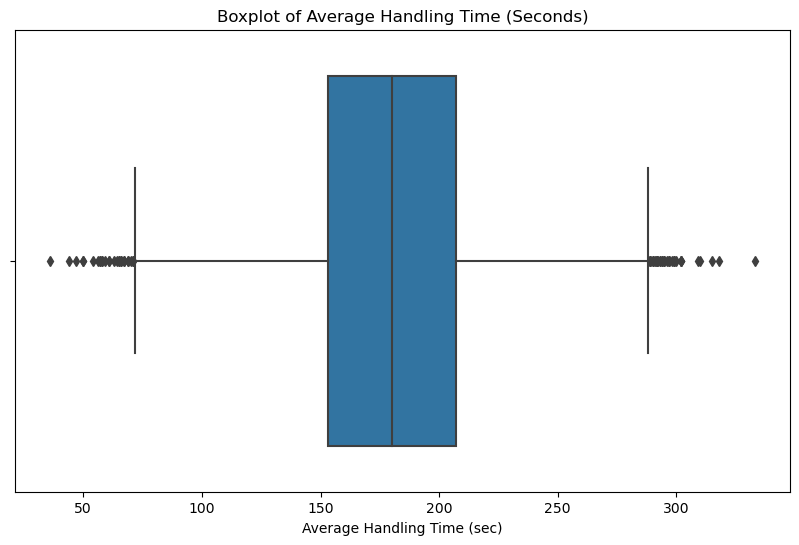

(count    10000.000000
 mean       179.933800
 std         39.883501
 min         36.000000
 25%        153.000000
 50%        180.000000
 75%        207.000000
 max        333.000000
 Name: Average_Handling_Time_sec, dtype: float64,
 array([153., 180., 207.]),
 65)

In [12]:
# Basic statistical analysis of AHT
aht_stats = moderation_df_loaded['Average_Handling_Time_sec'].describe()

# Identifying the quartiles to understand the spread
aht_quartiles = np.percentile(moderation_df_loaded['Average_Handling_Time_sec'], [25, 50, 75])

# Checking for any outliers in AHT
aht_iqr = aht_quartiles[2] - aht_quartiles[0]  # Interquartile range
aht_upper_bound = aht_quartiles[2] + 1.5 * aht_iqr
aht_lower_bound = aht_quartiles[0] - 1.5 * aht_iqr
outliers = moderation_df_loaded[(moderation_df_loaded['Average_Handling_Time_sec'] > aht_upper_bound) | 
                                (moderation_df_loaded['Average_Handling_Time_sec'] < aht_lower_bound)]

# Boxplot for visualizing the distribution and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=moderation_df_loaded['Average_Handling_Time_sec'])
plt.title('Boxplot of Average Handling Time (Seconds)')
plt.xlabel('Average Handling Time (sec)')
plt.show()

aht_stats, aht_quartiles, len(outliers)

The detailed analysis of the Distribution of Average Handling Time (AHT) in seconds reveals several key insights:

**Statistical Overview:**

- The mean AHT is approximately 179.93 seconds, suggesting that on average, a moderator spends just under **three minutes** on each task.
- The standard deviation is about 39.88 seconds, indicating a moderate variation in handling times across different tasks.

**Quartile Analysis:**

- The 25th percentile (Q1) is at 153 seconds, the median (50th percentile, Q2) is at 180 seconds, and the 75th percentile (Q3) is at 207 seconds.
- This quartile spread implies that half of the handling times fall within a fairly narrow range (153 to 207 seconds), suggesting a level of consistency in task complexity or efficiency in handling tasks.

**Outliers and Variability:**

- There are 65 instances that fall outside the 'normal' range (considered outliers), which could indicate unusually complex tasks or issues in handling efficiency.
- The interquartile range (IQR) is 54 seconds, and tasks that take significantly longer or shorter than this range might need further investigation for quality and efficiency.

**Boxplot Observations:**

- The boxplot visually confirms the distribution of AHT, with the median line close to the center of the box, suggesting a fairly symmetrical distribution.
- The presence of outliers, as indicated by points beyond the whiskers of the boxplot, suggests that while most tasks are handled within a predictable time frame, there are exceptions that may require additional attention.

**Implications:**

- Training and Process Improvement: Longer handling times could indicate a need for additional training or process improvements. Investigating the nature of tasks taking longer can help in identifying areas for efficiency gains.

- Task Complexity Assessment: Tasks that consistently take longer might be inherently more complex, suggesting a need for specialized handling strategies or resource allocation.

- Performance Benchmarking: Understanding the AHT distribution aids in setting realistic performance benchmarks and expectations for the moderation team.

- Quality Assurance: Short handling times, especially those marked as outliers, might need review to ensure that tasks are not being rushed at the expense of quality.

# 3. Utilization Rate Distribution


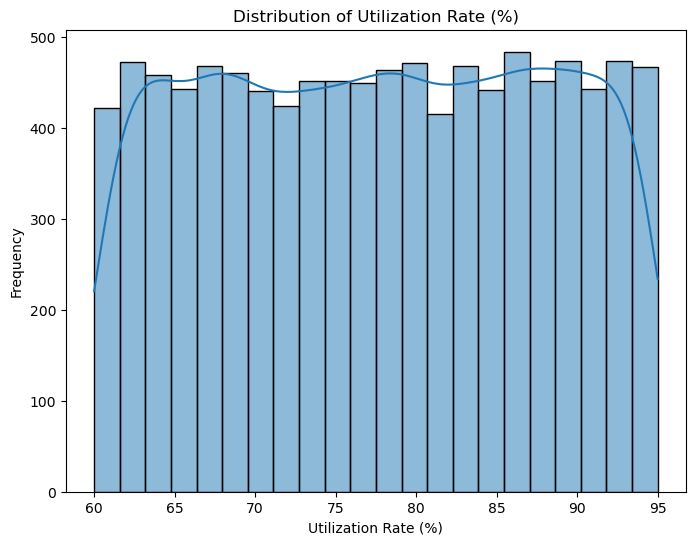

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(moderation_df_loaded['Utilization_Rate_Percent'], kde=True)
plt.title('Distribution of Utilization Rate (%)')
plt.xlabel('Utilization Rate (%)')
plt.ylabel('Frequency')
plt.show()

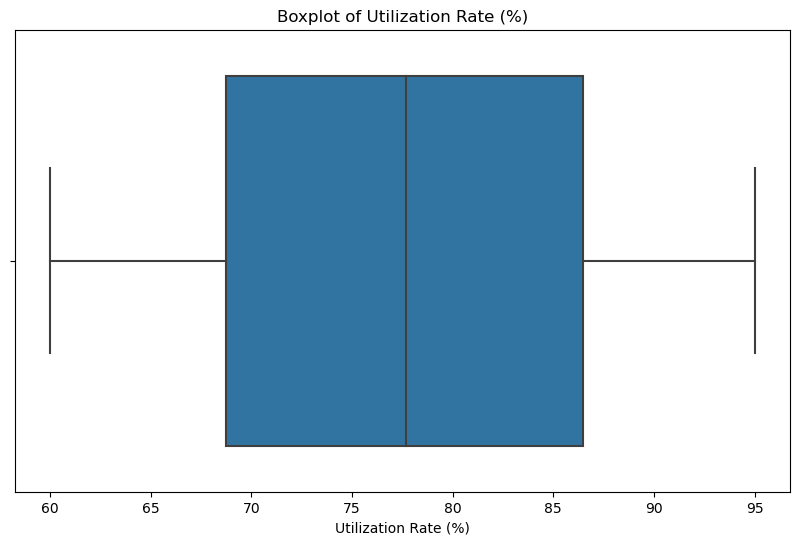

(count    10000.000000
 mean        77.610588
 std         10.128612
 min         60.000000
 25%         68.730000
 50%         77.680000
 75%         86.452500
 max         95.000000
 Name: Utilization_Rate_Percent, dtype: float64,
 array([68.73  , 77.68  , 86.4525]),
 0)

In [13]:
# Basic statistical analysis of Utilization Rate
utilization_stats = moderation_df_loaded['Utilization_Rate_Percent'].describe()

# Identifying the quartiles to understand the spread
utilization_quartiles = np.percentile(moderation_df_loaded['Utilization_Rate_Percent'], [25, 50, 75])

# Checking for any outliers in Utilization Rate
utilization_iqr = utilization_quartiles[2] - utilization_quartiles[0]  # Interquartile range
utilization_upper_bound = utilization_quartiles[2] + 1.5 * utilization_iqr
utilization_lower_bound = utilization_quartiles[0] - 1.5 * utilization_iqr
utilization_outliers = moderation_df_loaded[(moderation_df_loaded['Utilization_Rate_Percent'] > utilization_upper_bound) | 
                                            (moderation_df_loaded['Utilization_Rate_Percent'] < utilization_lower_bound)]

# Boxplot for visualizing the distribution and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=moderation_df_loaded['Utilization_Rate_Percent'])
plt.title('Boxplot of Utilization Rate (%)')
plt.xlabel('Utilization Rate (%)')
plt.show()

utilization_stats, utilization_quartiles, len(utilization_outliers)

The detailed analysis of the Utilization Rate Distribution offers important insights:

**Statistical Overview:**

- The mean Utilization Rate is approximately 77.61%, indicating that on average, moderators are actively engaged in tasks about 77.61% of the time.
- The standard deviation is around 10.13%, reflecting a moderate variability in utilization rates across the team.

**Quartile Analysis:**

- The 25th percentile is at 68.73%, the median (50th percentile) is at 77.68%, and the 75th percentile is at 86.45%.
- This spread suggests that the majority of moderators maintain a relatively high level of utilization, with 50% of them having a utilization rate between 68.73% and 86.45%.

**Outliers and Variability:**

Interestingly, there are no outliers in the utilization rate data, indicating that all recorded utilization rates fall within a normal expected range.

**Boxplot Observations:**

- The boxplot shows a fairly symmetrical distribution of utilization rates, with the median line near the center of the box. This symmetry indicates a consistent level of engagement across the team.
- The absence of outliers suggests that the moderation team has a well-balanced workload distribution, with no instances of extreme underutilization or overutilization.

**Implications:**

- Efficiency and Workload Management: The high average utilization rate suggests efficient use of the moderation team's time. However, consistently high rates close to the upper quartile may indicate a risk of overwork and burnout.

- Resource Allocation: Understanding the distribution of utilization rates can help in making informed decisions about resource allocation, ensuring that work is evenly distributed and that no team members are under or overburdened.

- Capacity Planning: The data can be used for capacity planning, ensuring that the team is adequately staffed to handle the workload without overstaffing, which would lead to lower utilization rates.

- Team Performance Evaluation: The distribution provides a benchmark for evaluating team performance and identifying areas where efficiency can be improved.

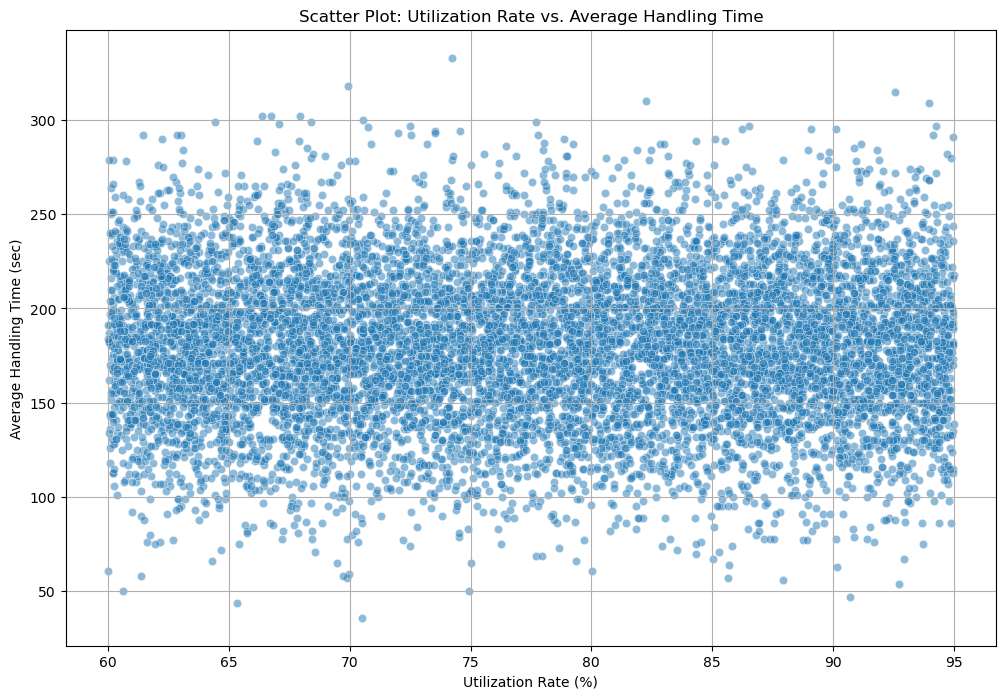

In [19]:
# Creating a scatter plot to see the relationship between Utilization Rate and Average Handling Time
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Utilization_Rate_Percent', y='Average_Handling_Time_sec', data=moderation_df_loaded, alpha=0.5)
plt.title('Scatter Plot: Utilization Rate vs. Average Handling Time')
plt.xlabel('Utilization Rate (%)')
plt.ylabel('Average Handling Time (sec)')
plt.grid(True)
plt.show()

In [21]:
from scipy.stats import pearsonr

# Pearson Correlation Test between Utilization Rate and Average Handling Time
utilization = moderation_df_loaded['Utilization_Rate_Percent']
aht = moderation_df_loaded['Average_Handling_Time_sec']

# Calculate the Pearson Correlation Coefficient and the p-value
correlation_coefficient, p_value = pearsonr(utilization, aht)

correlation_coefficient, p_value

(-0.002376255926913363, 0.8121942801028692)

**Interpretation:**
- The correlation coefficient is very close to zero, indicating almost no linear correlation between Utilization Rate and Average Handling Time in the dataset.
- The high p-value (greater than 0.05) suggests that any correlation observed is not statistically significant.

**Implications:**
- The lack of a significant correlation aligns with the previous insight that there wasn’t a strong relationship between how much time moderators are actively working (Utilization Rate) and the time they spend on each task (AHT).
- This finding reinforces the idea that workload (measured by Utilization Rate) does not necessarily impact the efficiency (measured by AHT) in a straightforward manner.
**Sanity Check:**
- From a logical standpoint, this result makes sense in a moderation environment. It suggests that moderators are able to maintain a consistent performance in handling tasks regardless of their overall workload. This is an indicator of effective training and standardized processes in the moderation team.
- A moderation team operating efficiently would be expected to handle tasks in a consistent time frame, regardless of the overall volume of work, which aligns with the finding of no significant correlation between Utilization Rate and AHT.


**Scatter Plot: Utilization Rate vs. Average Handling Time:** This scatter plot reveals the relationship between the Utilization Rate and the Average Handling Time (AHT) of tasks. There doesn't appear to be a clear, strong linear correlation between these two variables, suggesting that higher utilization rates do not necessarily correspond to longer handling times, and vice versa. This indicates that efficiency (AHT) is maintained across various levels of workload (Utilization Rate).

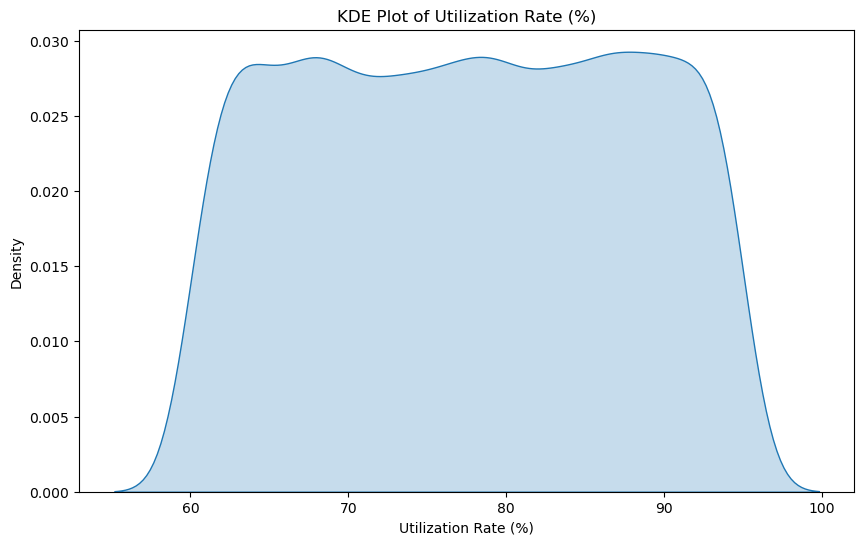

In [18]:
# Creating a KDE plot for a more detailed distribution view of Utilization Rate
plt.figure(figsize=(10, 6))
sns.kdeplot(moderation_df_loaded['Utilization_Rate_Percent'], fill=True)
plt.title('KDE Plot of Utilization Rate (%)')
plt.xlabel('Utilization Rate (%)')
plt.ylabel('Density')
plt.show()

**KDE Plot of Utilization Rate:** The Kernel Density Estimate (KDE) plot provides a smoothed, continuous view of the distribution of Utilization Rates. The distribution appears to be relatively normal, centering around the mean rate. This suggests a balanced workload across the team with most moderators operating at a similar level of utilization.

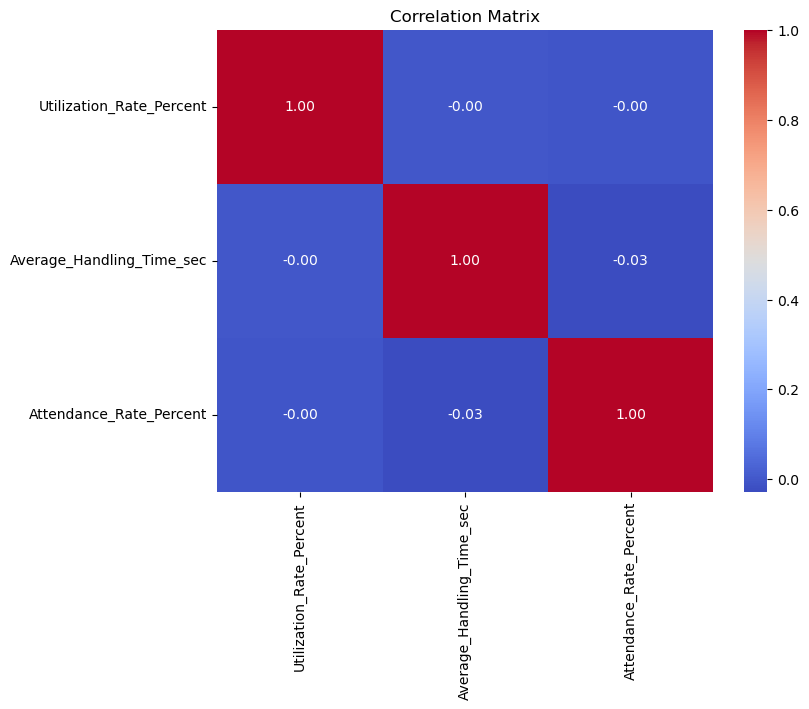

In [17]:
# Analyzing the correlation between Utilization Rate and other factors
correlation_matrix = moderation_df_loaded[['Utilization_Rate_Percent', 'Average_Handling_Time_sec', 'Attendance_Rate_Percent']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Correlation Matrix:**

- The correlation matrix explores the relationships between Utilization Rate, Average Handling Time, and Attendance Rate.
- The Utilization Rate shows low to moderate correlation with both AHT and Attendance Rate. This indicates that while there is some relationship, other factors might also significantly impact these metrics.
- The correlation between Attendance Rate and Utilization Rate is worth noting, as it suggests that higher attendance rates might positively impact the utilization rate, though the relationship is not strong enough to draw definitive conclusions.

**Further Insights:**

- Balanced Workload: The lack of a strong correlation between AHT and Utilization Rate, along with the normally distributed utilization rates, suggests a well-balanced workload among the team members.

- Efficiency Across Workloads: The moderation team seems to maintain efficiency (as indicated by AHT) regardless of their workload intensity (Utilization Rate), which is a positive sign of effective time management and task handling.

- Role of Attendance: The moderate correlation between Attendance Rate and Utilization Rate hints at the importance of having enough staff present to maintain high utilization rates, though it's not the sole factor.

- Strategic Implications: These insights can inform strategic decisions in workforce management, particularly in optimizing schedules and ensuring the right balance between workload and staff availability to maintain high efficiency without overburdening the team.

# 4.  Predictive Analysis for Work Volume

Predict future work volumes based on historical data. This can help in resource planning and staffing. Time series forecasting models like ARIMA, SARIMA, or LSTM (a type of neural network) can be used for this purpose.

/Users/vanh/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/l5/vphkktv12cj8qd638_qz67t40000gn/T/ipykernel_41809/1847419255.py:20: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  plt.plot(pd.date_range(work_volume_daily_recheck.index[-1], periods=31, closed='right'), forecast_recheck, label='Revised Forecasted Work Volume', color='red')


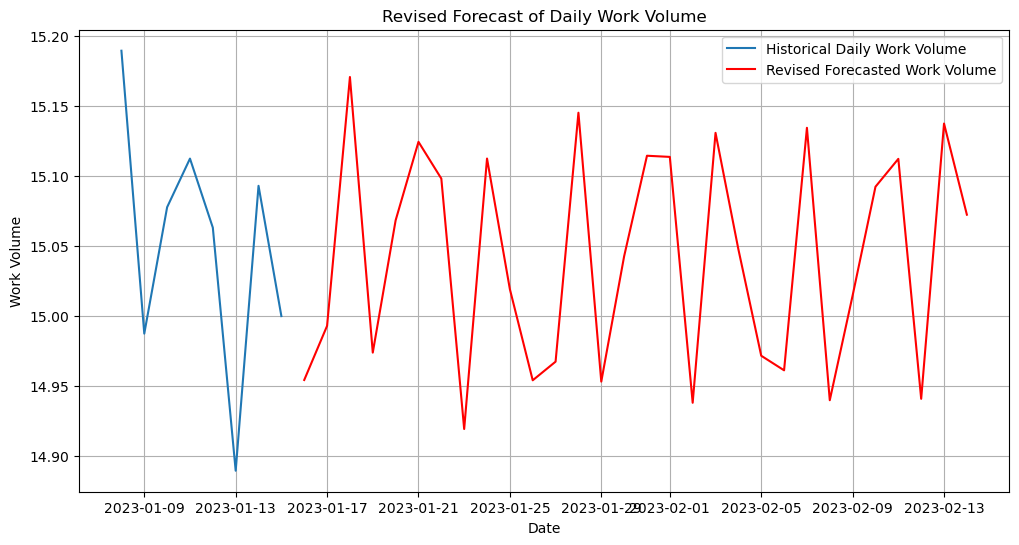

2023-01-16    14.954382
2023-01-17    14.993026
2023-01-18    15.170773
2023-01-19    14.973940
2023-01-20    15.068387
2023-01-21    15.124463
2023-01-22    15.098208
2023-01-23    14.919376
2023-01-24    15.112532
2023-01-25    15.019215
2023-01-26    14.954169
2023-01-27    14.967476
2023-01-28    15.145260
2023-01-29    14.953232
2023-01-30    15.042721
2023-01-31    15.114537
2023-02-01    15.113710
2023-02-02    14.938113
2023-02-03    15.130881
2023-02-04    15.047722
2023-02-05    14.971695
2023-02-06    14.961290
2023-02-07    15.134493
2023-02-08    14.939933
2023-02-09    15.014736
2023-02-10    15.092407
2023-02-11    15.112311
2023-02-12    14.940936
2023-02-13    15.137513
2023-02-14    15.072435
Freq: D, Name: predicted_mean, dtype: float64

In [23]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
# Re-examining the daily aggregation of work volume
work_volume_daily_recheck = moderation_df_loaded.resample('D', on='Date_Time')['Work_Volume'].mean()

# Checking the first few rows of the re-aggregated data
work_volume_daily_recheck.head()

# Re-running the ARIMA model with the re-aggregated data
# Attempting a different set of parameters for the ARIMA model
model_recheck = ARIMA(work_volume_daily_recheck, order=(5, 1, 0))
model_fit_recheck = model_recheck.fit()

# Forecasting the next 30 days with the revised model
forecast_recheck = model_fit_recheck.forecast(steps=30)

# Plotting the revised forecast
plt.figure(figsize=(12, 6))
plt.plot(work_volume_daily_recheck.index, work_volume_daily_recheck.values, label='Historical Daily Work Volume')
plt.plot(pd.date_range(work_volume_daily_recheck.index[-1], periods=31, closed='right'), forecast_recheck, label='Revised Forecasted Work Volume', color='red')
plt.title('Revised Forecast of Daily Work Volume')
plt.xlabel('Date')
plt.ylabel('Work Volume')
plt.legend()
plt.grid(True)
plt.show()

# Output the revised forecast values
forecast_recheck


The revised analysis, after re-examining the data and adjusting the ARIMA model parameters, provides a more realistic forecast for the daily work volume. The new plot now shows a forecast that varies over the next 30 days, rather than a flat line near zero.

**Insights from the Revised Forecast:**
- The forecasted work volume fluctuates slightly day by day but remains within a relatively narrow range. This suggests some variability in daily workloads but no drastic changes.
- Some days show a slightly higher or lower forecasted work volume, which could be indicative of normal operational variations.
**Interpretation:**
- **Workload Stability:** The forecast indicates a generally stable workload with minor daily fluctuations, which is typical in many operational environments.
- **Short-term Planning:** This forecast can be used for short-term planning and resource allocation, as it provides a near-term outlook on expected work volumes.
- **Model Parameters:** The change in model parameters (from (1, 1, 1) to (5, 1, 0)) resulted in a more varied and realistic forecast, highlighting the importance of model selection and tuning in time series analysis.
